In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Data Import

In [8]:
train = pd.read_csv("./application_train.csv", index_col = "SK_ID_CURR")
#test = pd.read_csv("./application_test.csv")

### Explore training dataset

In [9]:
print("Train Size: " + str(train.shape))
train.head()

Train Size: (307511, 121)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
for column in train:
    cur = train[column]
    if cur.dtype == "object":
        tab = pd.crosstab(train["TARGET"], cur, normalize = "index")
        print(tab)
        print("\n")

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                     0.902100         0.097900
1                     0.935388         0.064612


CODE_GENDER         F         M       XNA
TARGET                                   
0            0.666032  0.333954  0.000014
1            0.570796  0.429204  0.000000


FLAG_OWN_CAR         N         Y
TARGET                          
0             0.656824  0.343176
1             0.694824  0.305176


FLAG_OWN_REALTY         N         Y
TARGET                             
0                0.305487  0.694513
1                0.315891  0.684109


NAME_TYPE_SUITE  Children    Family  Group of people   Other_A   Other_B  \
TARGET                                                                     
0                0.010751  0.131953         0.000881  0.002807  0.005670   
1                0.009735  0.121551         0.000929  0.003070  0.007029   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
T

Notes from a quick look at the contingency tables for the categorical variables:

* NAME_EDUCATION_TYPE looks like it is important. Significant 0s (paying on time) tied to higher education and significant 1s tied to Secondary/Secondary special

* NAME_FAMILY_STATUS looks important. Significant relationship between more 0s and married

* OCCUPATION_TYPE looks important in general. Laborers, Low-skill Laborers, in particular


In [54]:
for column in train:
    cur = train[column]
    if cur.dtype != "object":
        no_prob = train[column][train["TARGET"] == 0]
        prob = train[column][train["TARGET"] == 1]
        val = stats.ttest_ind(no_prob, prob, equal_var = False, nan_policy = "omit")
        sig = "*" if val[1] < 0.05 else ""
        print("{}: p = {:.4f} {}".format(column, val[1], sig))

TARGET: p = 0.0000 *
CNT_CHILDREN: p = 0.0000 *
AMT_INCOME_TOTAL: p = 0.4650 
AMT_CREDIT: p = 0.0000 *
AMT_ANNUITY: p = 0.0000 *
AMT_GOODS_PRICE: p = 0.0000 *
REGION_POPULATION_RELATIVE: p = 0.0000 *
DAYS_BIRTH: p = 0.0000 *
DAYS_EMPLOYED: p = 0.0000 *
DAYS_REGISTRATION: p = 0.0000 *
DAYS_ID_PUBLISH: p = 0.0000 *
OWN_CAR_AGE: p = 0.0000 *
FLAG_MOBIL: p = 0.3173 
FLAG_EMP_PHONE: p = 0.0000 *
FLAG_WORK_PHONE: p = 0.0000 *
FLAG_CONT_MOBILE: p = 0.8352 
FLAG_PHONE: p = 0.0000 *
FLAG_EMAIL: p = 0.3245 
CNT_FAM_MEMBERS: p = 0.0000 *
REGION_RATING_CLIENT: p = 0.0000 *
REGION_RATING_CLIENT_W_CITY: p = 0.0000 *
HOUR_APPR_PROCESS_START: p = 0.0000 *
REG_REGION_NOT_LIVE_REGION: p = 0.0037 *
REG_REGION_NOT_WORK_REGION: p = 0.0002 *
LIVE_REGION_NOT_WORK_REGION: p = 0.1253 
REG_CITY_NOT_LIVE_CITY: p = 0.0000 *
REG_CITY_NOT_WORK_CITY: p = 0.0000 *
LIVE_CITY_NOT_WORK_CITY: p = 0.0000 *
EXT_SOURCE_1: p = 0.0000 *
EXT_SOURCE_2: p = 0.0000 *
EXT_SOURCE_3: p = 0.0000 *
APARTMENTS_AVG: p = 0.0000 *
BASEMEN

AttributeError: Unknown property type

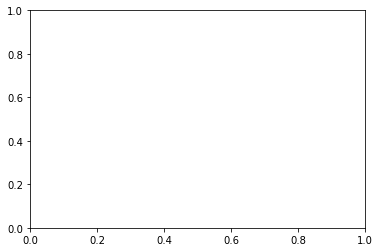

In [56]:
for column in train:
    cur = train[column]
    if cur.dtype != "object":
        train.groupby("TARGET")[column].plot(type = "hist", subplots = True)

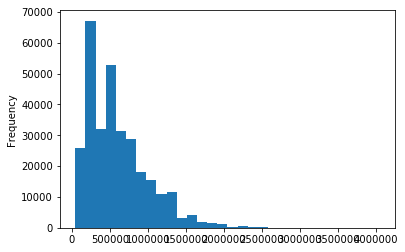

In [81]:
column = "AMT_CREDIT"
train[column].plot(kind = "hist", bins = 30)